<a href="https://colab.research.google.com/github/am28012/atharvamore_github.io/blob/main/CounterCheck_%E2%80%93_An_ML_Based_Counterfeit_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

In [78]:
df = pd.read_csv('/content/counterfeitproducts.csv')
df.head()
df.describe()

,price,seller_rating,seller_reviews,product_images,description_length,shipping_time_days,spelling_errors,domain_age_days,payment_methods_count,views,purchases,wishlist_adds,certification_badges,warranty_months
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.869204,3.732980,3529.809200,4.686200,463.56400,13.4622,1.093400,1456.105400,3.254000,2469.286600,123.050800,39.169600,2.026400,11.562000
std,136.741376,0.995313,3281.418979,2.651629,294.29469,11.5496,1.160752,1143.264222,1.357296,1424.525316,107.889725,28.945971,1.405453,6.882037
min,10.120000,1.000000,0.000000,1.000000,50.00000,1.0000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,109.787500,3.500000,85.000000,2.000000,179.00000,5.0000,0.000000,307.500000,2.000000,1245.750000,34.000000,13.000000,1.000000,6.000000
50%,191.815000,4.000000,2922.500000,5.000000,433.50000,10.0000,1.000000,1319.000000,3.000000,2433.000000,93.000000,34.000000,2.000000,12.000000
75%,336.615000,4.500000,6401.500000,7.000000,725.25000,18.0000,1.000000,2465.000000,4.000000,3701.500000,185.000000,62.000000,3.000000,18.000000
max,499.840000,5.000000,9996.000000,9.000000,999.00000,44.0000,4.000000,3649.000000,5.000000,4996.000000,491.000000,99.000000,4.000000,23.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                5000 non-null   object 
 1   seller_id                 5000 non-null   object 
 2   category                  5000 non-null   object 
 3   brand                     5000 non-null   object 
 4   price                     5000 non-null   float64
 5   seller_rating             5000 non-null   float64
 6   seller_reviews            5000 non-null   int64  
 7   product_images            5000 non-null   int64  
 8   description_length        5000 non-null   int64  
 9   shipping_time_days        5000 non-null   int64  
 10  spelling_errors           5000 non-null   int64  
 11  domain_age_days           5000 non-null   int64  
 12  contact_info_complete     5000 non-null   bool   
 13  return_policy_clear       5000 non-null   bool   
 14  payment_

In [79]:
df.describe()


,price,seller_rating,seller_reviews,product_images,description_length,shipping_time_days,spelling_errors,domain_age_days,payment_methods_count,views,purchases,wishlist_adds,certification_badges,warranty_months
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.869204,3.732980,3529.809200,4.686200,463.56400,13.4622,1.093400,1456.105400,3.254000,2469.286600,123.050800,39.169600,2.026400,11.562000
std,136.741376,0.995313,3281.418979,2.651629,294.29469,11.5496,1.160752,1143.264222,1.357296,1424.525316,107.889725,28.945971,1.405453,6.882037
min,10.120000,1.000000,0.000000,1.000000,50.00000,1.0000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,109.787500,3.500000,85.000000,2.000000,179.00000,5.0000,0.000000,307.500000,2.000000,1245.750000,34.000000,13.000000,1.000000,6.000000
50%,191.815000,4.000000,2922.500000,5.000000,433.50000,10.0000,1.000000,1319.000000,3.000000,2433.000000,93.000000,34.000000,2.000000,12.000000
75%,336.615000,4.500000,6401.500000,7.000000,725.25000,18.0000,1.000000,2465.000000,4.000000,3701.500000,185.000000,62.000000,3.000000,18.000000
max,499.840000,5.000000,9996.000000,9.000000,999.00000,44.0000,4.000000,3649.000000,5.000000,4996.000000,491.000000,99.000000,4.000000,23.000000


In [ ]:
df.isna().sum()

,0
product_id,0
seller_id,0
category,0
brand,0
price,0
seller_rating,0
seller_reviews,0
product_images,0
description_length,0
shipping_time_days,0


In [ ]:
print(f"listing date is in object so convert it to datetime feature")
df['listing_date'] = pd.to_datetime(df['listing_date'] , format='%d-%m-%Y')
df['listing_year'] = df['listing_date'].dt.year
df['listing_month'] = df['listing_date'].dt.month
df.info()

listing date is in object so convert it to datetime feature
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   product_id                5000 non-null   object        
 1   seller_id                 5000 non-null   object        
 2   category                  5000 non-null   object        
 3   brand                     5000 non-null   object        
 4   price                     5000 non-null   float64       
 5   seller_rating             5000 non-null   float64       
 6   seller_reviews            5000 non-null   int64         
 7   product_images            5000 non-null   int64         
 8   description_length        5000 non-null   int64         
 9   shipping_time_days        5000 non-null   int64         
 10  spelling_errors           5000 non-null   int64         
 11  domain_age_days       

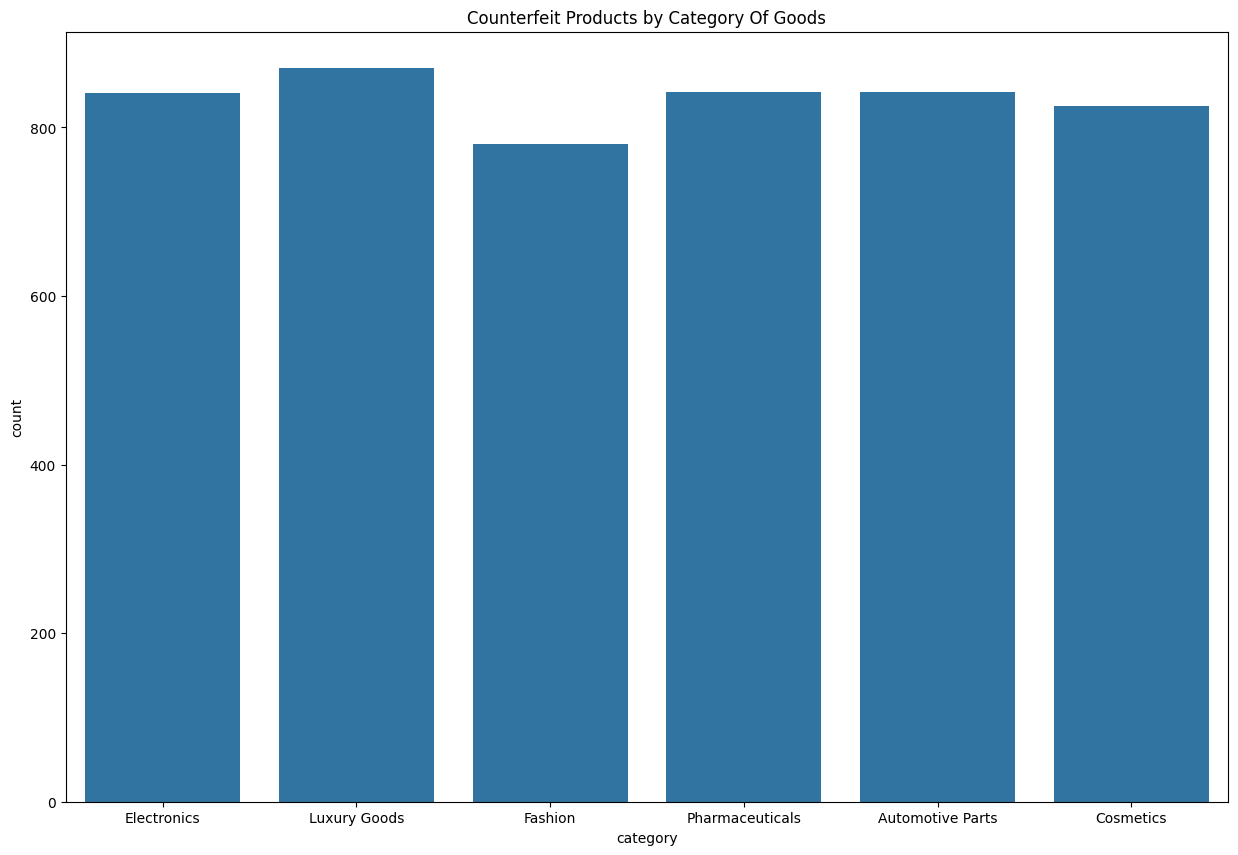

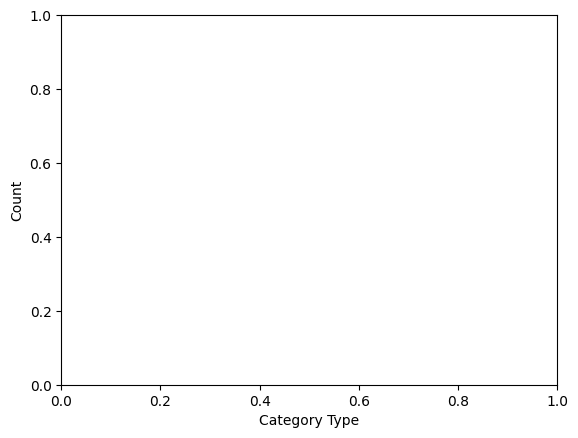

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'category' , data = df)
plt.title('Counterfeit Products by Category Of Goods')
plt.show()
plt.xlabel('Category Type')
plt.ylabel('Count')
plt.show()


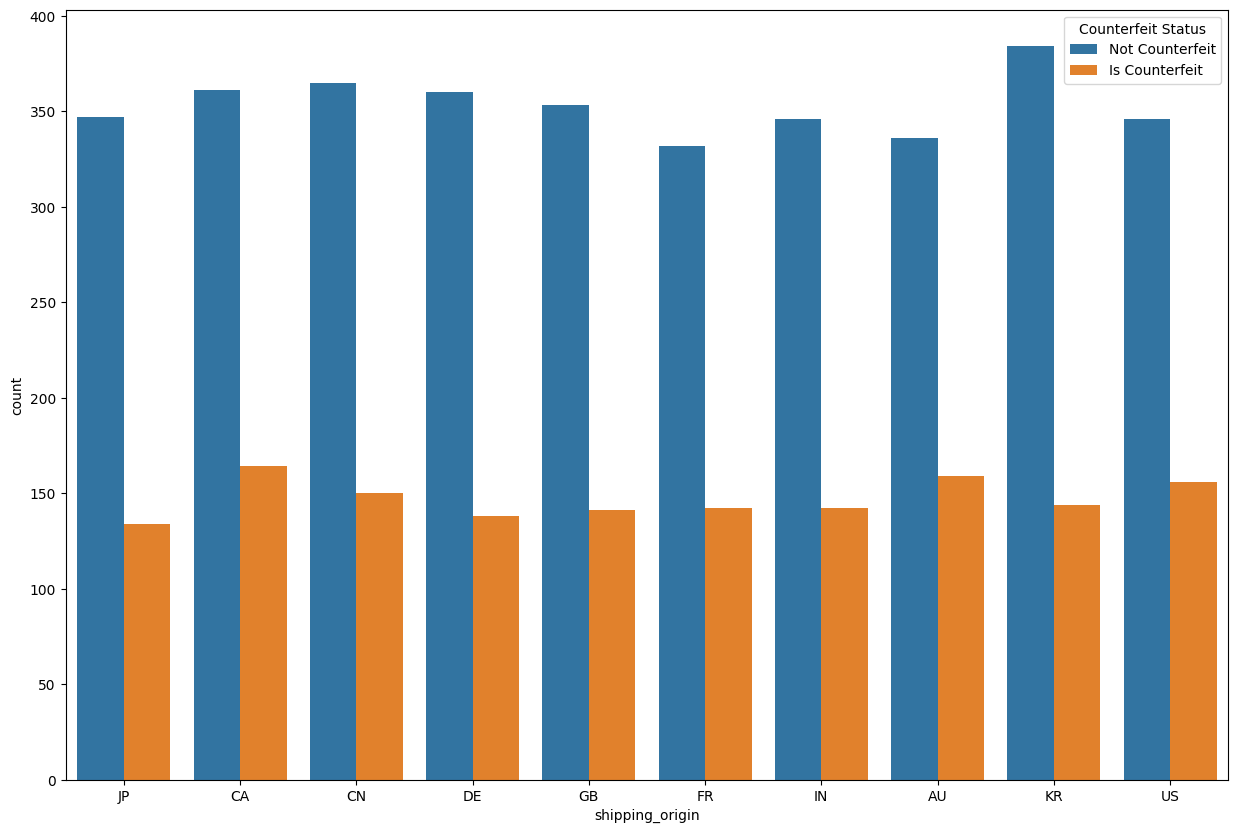

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'shipping_origin' , hue = 'is_counterfeit', data = df)
plt.legend(title='Counterfeit Status', labels=['Not Counterfeit', 'Is Counterfeit'])
plt.show()

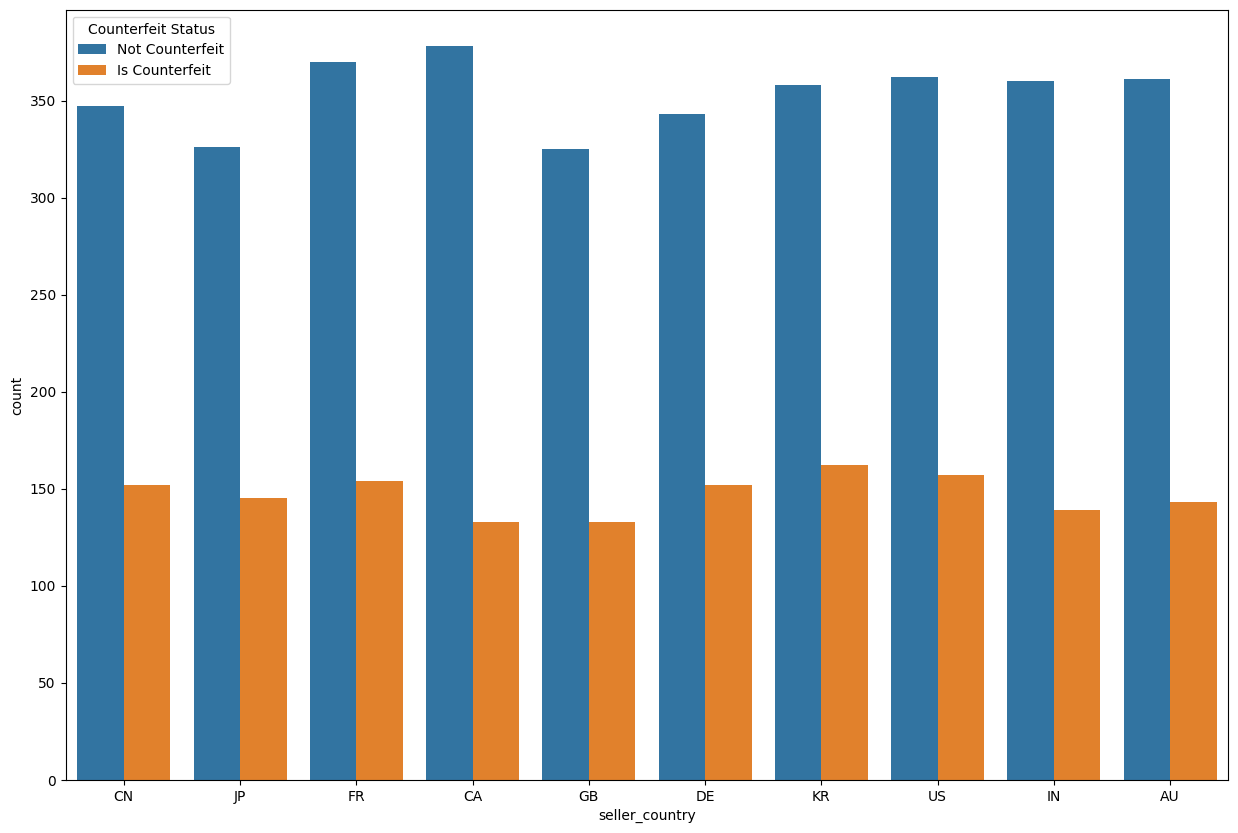

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'seller_country' , hue = 'is_counterfeit', data = df)
plt.legend(title='Counterfeit Status', labels=['Not Counterfeit', 'Is Counterfeit'])
plt.show()

In [ ]:
contingency_category = pd.crosstab(df['category'], df['is_counterfeit'])
display(contingency_category)

is_counterfeit,False,True
category,,
Automotive Parts,580,262
Cosmetics,584,241
Electronics,573,268
Fashion,556,224
Luxury Goods,632,238
Pharmaceuticals,605,237


In [ ]:
contingency_shipping_origin = pd.crosstab(df['shipping_origin'], df['is_counterfeit'])
display(contingency_shipping_origin)

is_counterfeit,False,True
shipping_origin,,
AU,336,159
CA,361,164
CN,365,150
DE,360,138
FR,332,142
GB,353,141
IN,346,142
JP,347,134
KR,384,144


In [ ]:
contingency_seller_country = pd.crosstab(df['seller_country'], df['is_counterfeit'])
display(contingency_seller_country)

is_counterfeit,False,True
seller_country,,
AU,361,143
CA,378,133
CN,347,152
DE,343,152
FR,370,154
GB,325,133
IN,360,139
JP,326,145
KR,358,162


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = df.drop(['product_id', 'seller_id', 'listing_date', 'listing_year', 'listing_month', 'is_counterfeit'], axis=1)
target = df['is_counterfeit']

for col in features.select_dtypes(include='bool').columns:
    features[col] = features[col].astype(int)

# One-hot encode categorical features
features = pd.get_dummies(features, columns=['category', 'brand', 'seller_country', 'shipping_origin'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Identify numerical columns
numerical_cols = features.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

display(X_train.head())
display(X_test.head())

,price,seller_rating,seller_reviews,product_images,description_length,shipping_time_days,spelling_errors,domain_age_days,contact_info_complete,return_policy_clear,...,seller_country_US,shipping_origin_CA,shipping_origin_CN,shipping_origin_DE,shipping_origin_FR,shipping_origin_GB,shipping_origin_IN,shipping_origin_JP,shipping_origin_KR,shipping_origin_US
4227,0.306291,0.078228,1.948966,0.882210,0.852039,-0.128405,-0.944691,1.371685,0.616268,0.669105,...,False,False,False,False,False,False,False,False,True,False
4676,-0.096804,1.173366,0.567127,0.125679,1.383258,-0.301282,-0.085490,-0.374820,0.616268,0.669105,...,False,False,False,False,False,False,False,False,False,False
800,-0.513939,0.277344,-0.288472,1.260475,0.143747,-0.560598,-0.944691,-0.755558,0.616268,0.669105,...,False,False,False,False,False,True,False,False,False,False
3671,-1.404515,-2.410723,-1.068064,-1.387384,-1.184299,0.217350,2.492111,-1.114464,0.616268,0.669105,...,False,False,False,True,False,False,False,False,False,False
4193,-0.032568,0.675576,0.011583,0.882210,-0.666702,-0.214843,-0.085490,0.113329,0.616268,0.669105,...,False,False,False,False,False,False,False,True,False,False


,price,seller_rating,seller_reviews,product_images,description_length,shipping_time_days,spelling_errors,domain_age_days,contact_info_complete,return_policy_clear,...,seller_country_US,shipping_origin_CA,shipping_origin_CN,shipping_origin_DE,shipping_origin_FR,shipping_origin_GB,shipping_origin_IN,shipping_origin_JP,shipping_origin_KR,shipping_origin_US
1501,0.874232,0.177786,1.160216,0.503944,-0.343203,-0.733476,-0.085490,1.572533,0.616268,0.669105,...,False,True,False,False,False,False,False,False,False,False
2586,-1.400005,-1.315585,-1.062570,-1.387384,-1.306888,1.686808,1.632910,-0.993082,-1.622671,-1.494533,...,True,False,False,False,False,False,False,True,False,False
2653,-1.168449,1.073808,0.818953,-0.252587,0.817986,-0.387721,-0.944691,-0.049096,0.616268,-1.494533,...,False,False,False,True,False,False,False,False,False,False
1055,-0.934638,-0.120888,1.153195,-0.630852,0.586430,-0.387721,-0.085490,-0.833277,0.616268,0.669105,...,False,False,False,False,False,False,False,True,False,False
705,-1.010878,0.675576,-0.708792,-0.252587,-0.132078,-0.474159,-0.944691,1.537603,0.616268,0.669105,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
print(f"Logistic Regression")
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Logistic Regression model trained successfully!")


Logistic Regression
Logistic Regression model trained successfully!


Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       719
        True       1.00      1.00      1.00       281

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
[[719   0]
 [  0 281]]


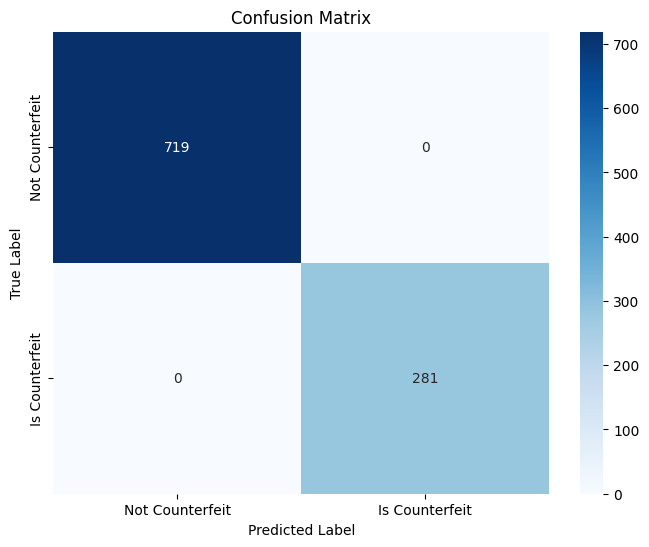

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Counterfeit', 'Is Counterfeit'], yticklabels=['Not Counterfeit', 'Is Counterfeit'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Conclusion: \nBased on the evaluation metrics, the Logistic Regression model achieved perfect accuracy on the test set, with 100% precision, recall, and F1-score for both counterfeit and non-counterfeit classes. \nThe confusion matrix shows no false positives or false negatives, indicating that the model was able to correctly identify all instances in the test set. \nThis suggests that the chosen features are highly effective in predicting counterfeit products in this dataset, and the trained model is currently performing exceptionally well on this evaluation set.")

Conclusion: 
Based on the evaluation metrics, the Logistic Regression model achieved perfect accuracy on the test set, with 100% precision, recall, and F1-score for both counterfeit and non-counterfeit classes. 
The confusion matrix shows no false positives or false negatives, indicating that the model was able to correctly identify all instances in the test set. 
This suggests that the chosen features are highly effective in predicting counterfeit products in this dataset, and the trained model is currently performing exceptionally well on this evaluation set.


In [ ]:
print(f"LightGbm")
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print("\nLightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))

LightGbm
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1189, number of negative: 2811
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1902
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.297250 -> initscore=-0.860428
[LightGBM] [Info] Start training from score -0.860428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

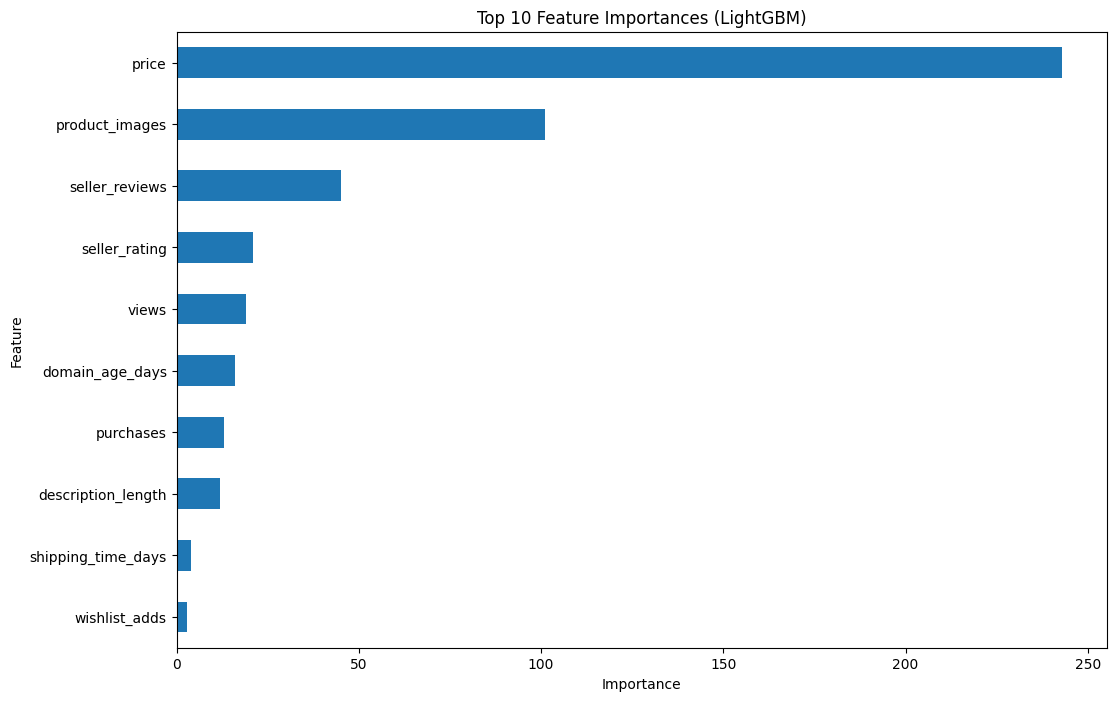

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the LightGBM model
feature_importances = lgbm.feature_importances_


feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort features by importance
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Plot  top 10 most important features
plt.figure(figsize=(12, 8))
sorted_feature_importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()